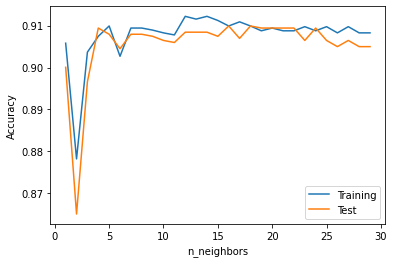

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import requests, zipfile
import io
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

cancer = load_breast_cancer()
#X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=12)

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header = None)

mushroom.columns = ['classes', 'cap_shape','cap_surface','cap_color','odor','bruises','gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape','stalk_root',
                                     'stalk_surface_above_ring','stalk_surface_below_ring',
                                 'stalck_color_above_ring','stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type','spore_print_color','population','habitat']


mushroom_dummy = pd.get_dummies(mushroom[['gill_attachment', 'gill_color', 'cap_color', 'odor']])
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x : 1 if x =='p' else 0)

X = mushroom_dummy.drop('flg', axis=1)
Y = mushroom_dummy['flg']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=12)

training_accuracy = []
test_accuracy = []

for n_neighbors in range(1,30):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train,Y_train)
    training_accuracy.append(model.score(X_train,Y_train))
    test_accuracy.append(model.score(X_test,Y_test))
    
plt.plot(range(1,30), training_accuracy, label='Training')
plt.plot(range(1,30), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

In [106]:
from sklearn.neighbors import KNeighborsRegressor
student = pd.read_csv('student-mat.csv', sep=';')

X = student.loc[:, ['age','Medu', 'Fedu', 'traveltime', 'studytime',
                   'failures','famrel', 'freetime', 'goout', 
                    'Dalc', 'Walc', 'absences', 'G1', 'G2']]


0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

(296, 14) (296,)


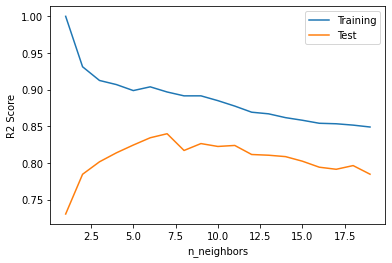

In [107]:
from importlib import reload
plt=reload(plt)
X_train, X_test, Y_train, Y_test = train_test_split(X, student.G3, random_state=0)

scores_train = []
scores_test = []

for n_neighbors in range(1,5):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train,Y_train)
    scores_train.append(model.score(X_train,Y_train))
    scores_test.append(model.score(X_test, Y_test))
    
print(X_train.shape, Y_train.shape)
plt.plot(range(1,20), scores_train, label='Training')
plt.plot(range(1,20), scores_test, label='Test')
plt.ylabel("R2 Score")
plt.xlabel("n_neighbors")
plt.legend()
